# slice leakage SMS
###### Author: Zimu Huo
###### Date: 06.2022

The slice-leakage is an artefact where the information from one slice is unintentionally transmitted to another slice during reconstruction. Any information from slice A that appears in slice B at the end of the reconstruction is considered slice leakage. The current method involves using a Monte Carlo simulation to impose unique frequency modulations on each slice. After reconstructions, the slice leakage can be determined by quantifying the frequency modulations on each individual slice. For example, if we add a 4 Hz modulation on slice A and a 6 Hz modulation on slice B, any 6 Hz component found on slice A after the reconstruction could be used to indicate slice leakage.

Here I showed four difference cases, slice grappa without caipi, slice grappa with caipi, split slice slice grappa without caipi, and spliy slice slice grappa with caipi

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Steen Moeller et al. 
    Title: Signal Leakage(L-Factor) as a Measure for Parallel Imaging Performance Among Simultaneously Multi-Slice (SMS) Excited & Acquired Signals
    Link: https://archive.ismrm.org/2012/0519.html
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
from util.simulator import * 
import util.phantom as phantom
from util.gfactor import *
from tqdm.notebook import tqdm
from util.zpad import *
from scipy import io
import util.simulator as simulator
from util.sg import * 
from util.spsg import * 

# slice grappa with no CAIPI shift

In [2]:
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
acc = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)
ny, nx, nc , ns = acc.shape

<div style="font-size: 1.2em;">
Her we first impose different frequencies on each slices across the time dimension
</div>


In [3]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = np.sum(fakeacc,-1)
    recon = sg(fakembdata,acs(fakeacc,(32,32)))
    leakage[...,i] =  rsos(ifft2c(recon), -2)

100%|█████████████████████████████████████████| 100/100 [17:10<00:00, 10.30s/it]


<div style="font-size: 1.2em;">
We can inspect the leakage for each slice of a given pixel across the time dimension. Since we imposed different frequencies on each slice, the leakage is proportional to the frequency component of other slices.
</div>


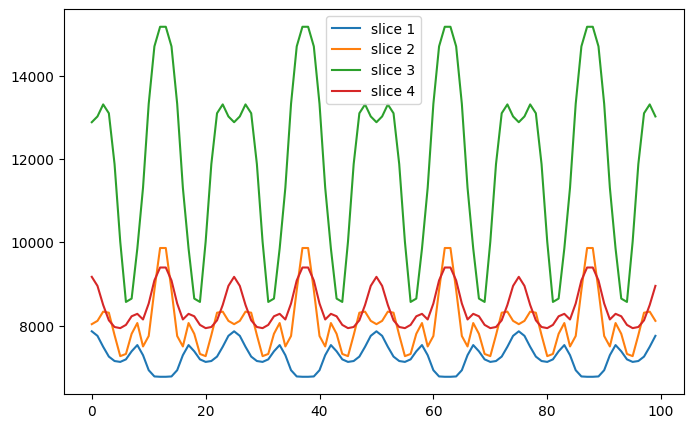

In [10]:
plt.figure(figsize = (8,5))
plt.plot(np.abs((leakage[60,60,0,:])))
plt.plot(np.abs((leakage[60,60,1,:])))
plt.plot(np.abs((leakage[60,60,2,:])))
plt.plot(np.abs((leakage[60,60,3,:])))
plt.legend(["slice 1", "slice 2", "slice 3", "slice 4"])

In [14]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps

Text(0.5, 1.0, 'slice leakage slice grappa with no CAIPI')

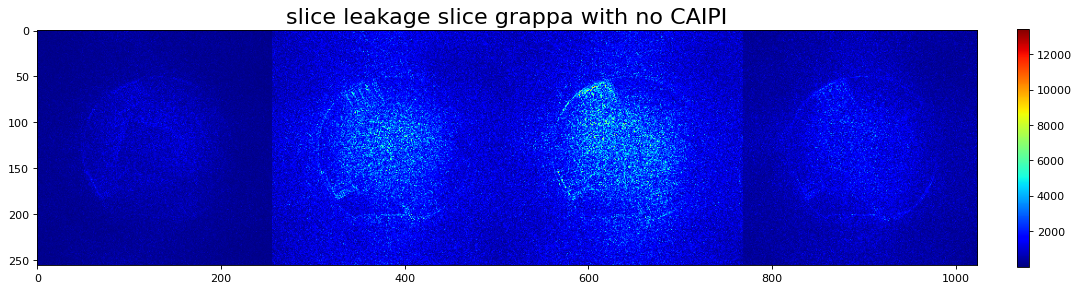

In [15]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
leakage_sg_nocaipi = np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F")
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(leakage_sg_nocaipi,cmap='jet')
plt.colorbar(tf, fraction=0.012, pad=0.04)
plt.title("slice leakage slice grappa with no CAIPI",fontsize = 20)

# slice grappa with CAIPI shift

In [18]:
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
acc = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)
ny, nx, nc , ns = acc.shape


In [19]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = fft2c(simulator.multiSliceCAIPI(ifft2c(fakeacc), cycle, ns))
    fakeacc = fft2c(simulator.singleSliceFov(ifft2c(fakeacc),shift))
    recon = sg(fakembdata,simulator.acs(fakeacc,(32,32)))
    recon = fft2c(singleSliceFov(ifft2c(recon),-shift))
    #leakage[...,i] =  np.mean(ifft2c(recon), 2)
    leakage[...,i] =  rsos(ifft2c(recon),-2)

100%|█████████████████████████████████████████| 100/100 [29:58<00:00, 17.98s/it]


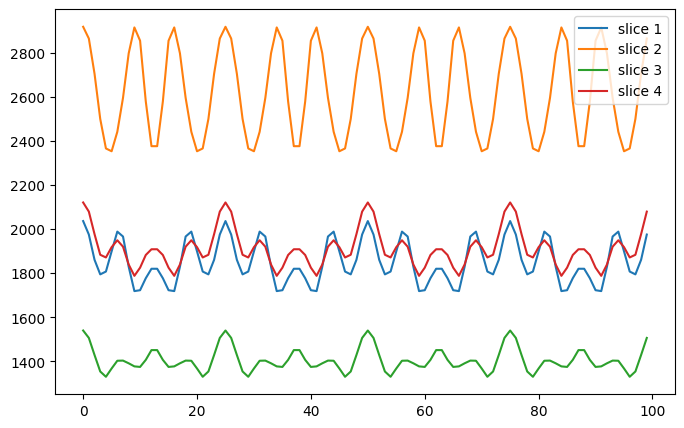

In [20]:
plt.figure(figsize = (8,5))
plt.plot(np.abs((leakage[60,60,0,:])))
plt.plot(np.abs((leakage[60,60,1,:])))
plt.plot(np.abs((leakage[60,60,2,:])))
plt.plot(np.abs((leakage[60,60,3,:])))
plt.legend(["slice 1", "slice 2", "slice 3", "slice 4"])

In [21]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps

# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 1")
# plt.imshow(np.abs(maps1).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 2")
# plt.imshow(np.abs(maps2).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 3")
# plt.imshow(np.abs(maps3).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 4")
# plt.imshow(np.abs(maps4).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     

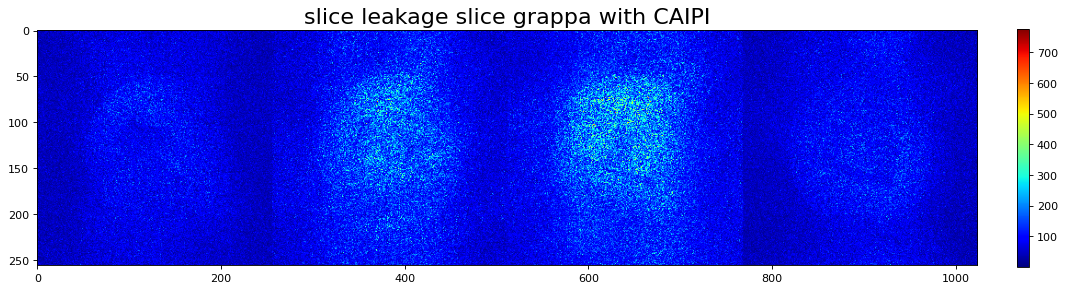

In [22]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
leakage_sg_caipi = np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F")
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(leakage_sg_caipi,cmap='jet')
plt.title("slice leakage slice grappa with CAIPI",fontsize = 20)
plt.colorbar(tf, fraction=0.012, pad=0.04)

# split slice slice grappa with no CAIPI shift

In [26]:
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
acc = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)
ny, nx, nc , ns = acc.shape


In [27]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = np.sum(fakeacc,-1)
    recon = spsg(fakembdata,simulator.acs(fakeacc,(32,32)))
    #leakage[...,i] =  np.mean(ifft2c(recon), 2)
    leakage[...,i] =  rsos(ifft2c(recon), -2)

100%|█████████████████████████████████████████| 100/100 [39:53<00:00, 23.93s/it]


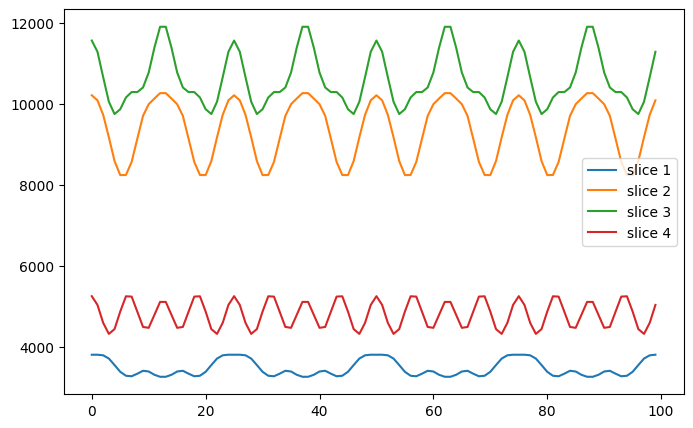

In [28]:
plt.figure(figsize = (8,5))
plt.plot(np.abs((leakage[60,60,0,:])))
plt.plot(np.abs((leakage[60,60,1,:])))
plt.plot(np.abs((leakage[60,60,2,:])))
plt.plot(np.abs((leakage[60,60,3,:])))
plt.legend(["slice 1", "slice 2", "slice 3", "slice 4"])

In [29]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps

# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 1")
# plt.imshow(np.abs(maps1).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 2")
# plt.imshow(np.abs(maps2).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 3")
# plt.imshow(np.abs(maps3).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     
# plt.figure(figsize = (16,12))
# plt.title("slice leakage for slice 4")
# plt.imshow(np.abs(maps4).reshape(ny,-1, order = "F"), cmap = "jet")
# plt.show()     

Text(0.5, 1.0, 'slice leakage split slice slice grappa with no CAIPI')

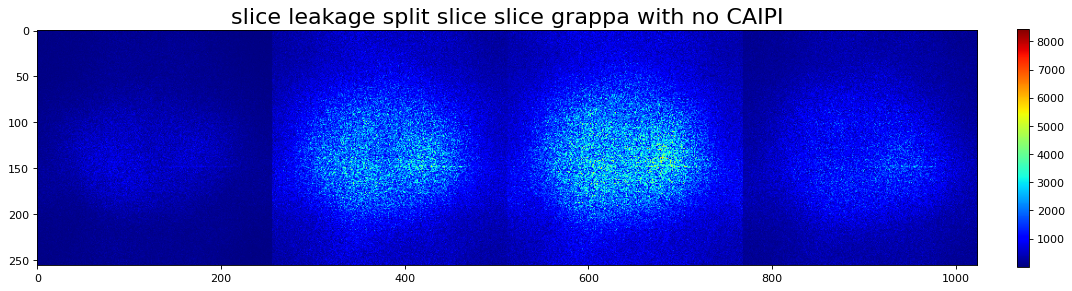

In [31]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
leakage_spsg_nocaipi = np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F")
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(leakage_spsg_nocaipi,cmap='jet')
plt.colorbar(tf, fraction=0.012, pad=0.04)
plt.title("slice leakage split slice slice grappa with no CAIPI",fontsize = 20)

# Split slice slice grappa with CAIPI shift

In [32]:
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
acc = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)
ny, nx, nc , ns = acc.shape


In [33]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = fft2c(simulator.multiSliceCAIPI(ifft2c(fakeacc), cycle, ns))
    fakeacc = fft2c(simulator.singleSliceFov(ifft2c(fakeacc),shift))
    recon = spsg(fakembdata,simulator.acs(fakeacc,(32,32)))
    recon = fft2c(simulator.singleSliceFov(ifft2c(recon),-shift))
    #leakage[...,i] =  np.mean(ifft2c(recon), 2)
    leakage[...,i] =  rsos(ifft2c(recon), -2)

100%|█████████████████████████████████████████| 100/100 [52:10<00:00, 31.31s/it]


In [38]:
# plt.figure(figsize = (8,5))
# plt.plot(np.abs((leakage[60,60,0,:])))
# plt.plot(np.abs((leakage[60,60,1,:])))
# plt.plot(np.abs((leakage[60,60,2,:])))
# plt.plot(np.abs((leakage[60,60,3,:])))
# plt.legend(["slice 1", "slice 2", "slice 3", "slice 4"])

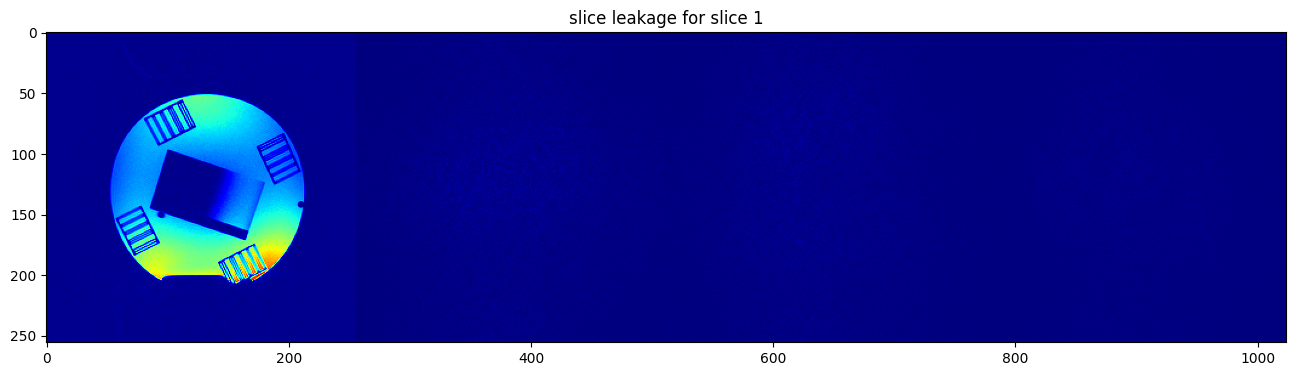

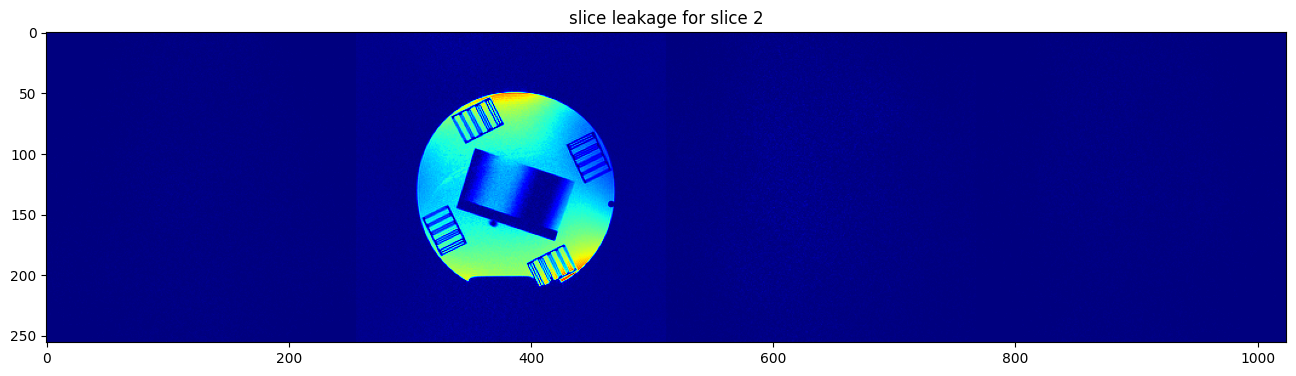

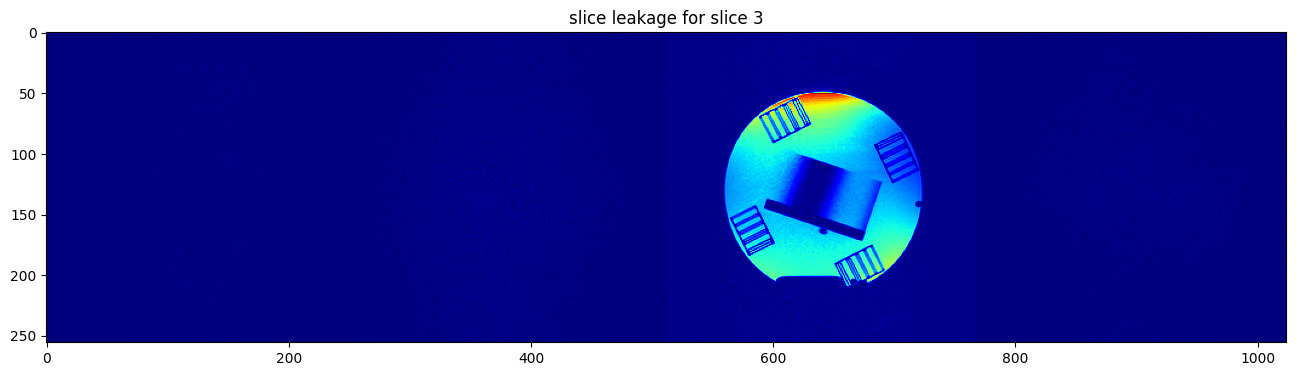

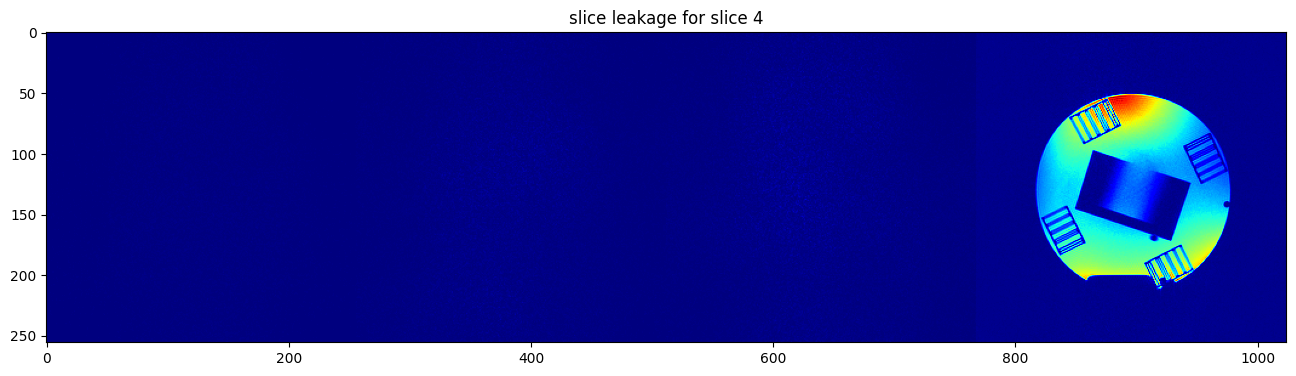

In [39]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps

ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps

plt.figure(figsize = (16,12))
plt.title("slice leakage for slice 1")
plt.imshow(np.abs(maps1).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()     
plt.figure(figsize = (16,12))
plt.title("slice leakage for slice 2")
plt.imshow(np.abs(maps2).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()     
plt.figure(figsize = (16,12))
plt.title("slice leakage for slice 3")
plt.imshow(np.abs(maps3).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()     
plt.figure(figsize = (16,12))
plt.title("slice leakage for slice 4")
plt.imshow(np.abs(maps4).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()     

Text(0.5, 1.0, 'slice leakage slice grappa with CAIPI')

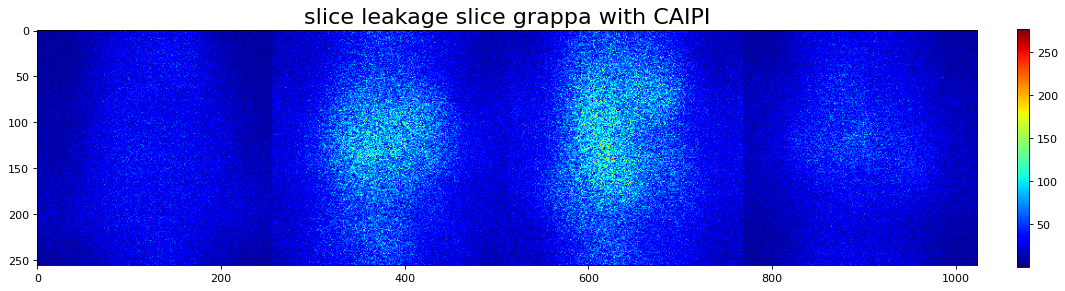

In [40]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
leakage_spsg_caipi = np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F")
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(leakage_spsg_caipi,cmap='jet')
plt.colorbar(tf, fraction=0.012, pad=0.04)
plt.title("slice leakage slice grappa with CAIPI",fontsize = 20)

# Results

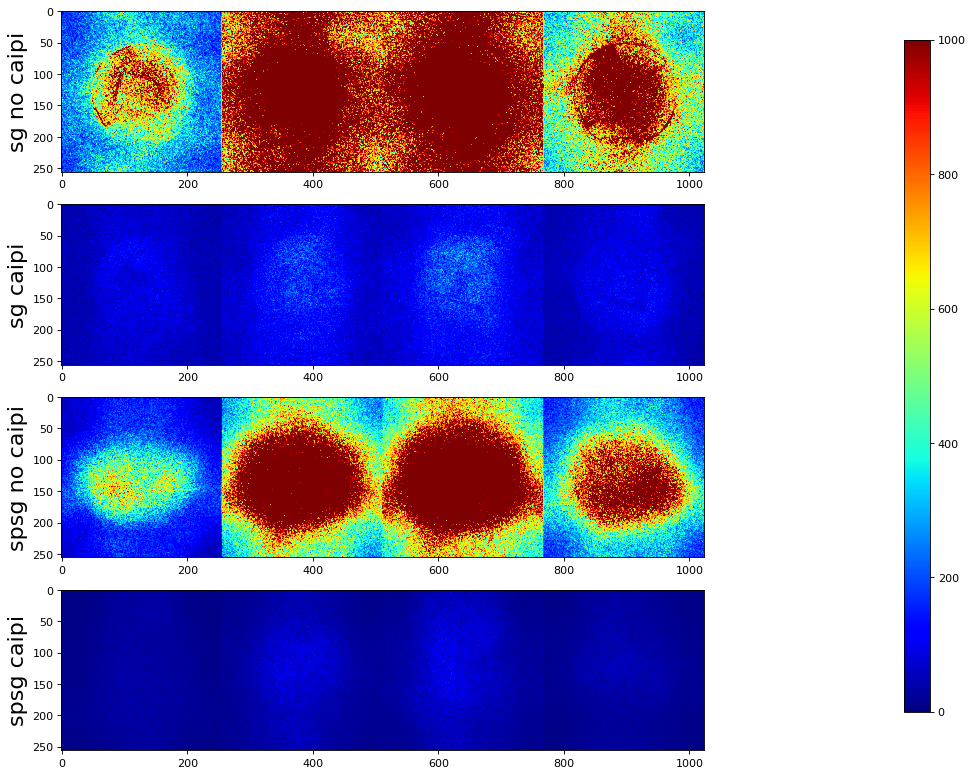

In [51]:
vmax = 1e3
plt.figure(figsize=(16, 12), dpi=80)

plt.subplot(411)
plt.ylabel("sg no caipi", fontsize=20)
tf1 = plt.imshow(leakage_sg_nocaipi, cmap='jet', vmin=0, vmax=vmax)

plt.subplot(412)
plt.ylabel("sg caipi", fontsize=20)
tf2 = plt.imshow(leakage_sg_caipi, cmap='jet', vmin=0, vmax=vmax)

plt.subplot(413)
plt.ylabel("spsg no caipi", fontsize=20)
tf3 = plt.imshow(leakage_spsg_nocaipi, cmap='jet', vmin=0, vmax=vmax)

plt.subplot(414)
plt.ylabel("spsg caipi", fontsize=20)
tf4 = plt.imshow(leakage_spsg_caipi, cmap='jet', vmin=0, vmax=vmax)

# Adding one colorbar for the entire figure
cbar_ax = plt.axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar
plt.colorbar(tf4, cax=cbar_ax)

# plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
plt.show()